<h1 align="center">🐍 Python + Excel</h1>

Мы будем использовать библиотеку **`xlwings`** для подключения к рабочей книге Excel.
<br><br>
**Xlwings** — это API Python с открытым исходным кодом для управления форматом файлов Excel. Используя API, вы можете автоматизировать Excel из Python для создания отчетов, написания UDF (пользовательских функций), написания макросов и удаленного управления Excel.

    🔗 Ссылка на документацию: https://docs.xlwings.org/en/stable/index.html


**GitHub ExcelPython:** https://github.com/ericremoreynolds/excelpython/blob/master/README.md

    ExcelPython интегрирован в xlwings! В дальнейшем ExcelPython больше не будет активно поддерживаться, и дальнейшая разработка будет осуществляться в контексте xlwings.

**GitHub xlwings:** https://github.com/xlwings/xlwings

**Сайт продукта:** https://www.xlwings.org/

## 🐣 Теоретический минимум по Python

1. Области видимости переменных.

    https://www.youtube.com/watch?v=TacyWpUF1Kk&ab_channel=selfedu


2. Замыкания в Python

    https://www.youtube.com/watch?v=sJF7OMNgLUs&ab_channel=selfedu

3. Введение в декораторы функций

    https://www.youtube.com/watch?v=v0qZPplzwUQ&t=321s&ab_channel=selfedu

4. Типизация

    https://youtu.be/dKxiHlZvULQ

5. TypeAlias

    https://youtu.be/xdRroK3WwJg

## ➕ Доп материал

1. Машинное обучение в Excel при помощи Python и PyXLL:

    https://habr.com/ru/companies/skillfactory/articles/569520/

2. Случайно наткнулся, но полезно:

    https://proglib.io/p/paketnyy-api-obedinenie-zaprosov-s-pomoshchyu-asyncio-i-batch-api-2023-03-23

3. Если не понятно что такое потоки и как это работает, то сюда:

    https://youtu.be/JIp14T9bvvc

4. OpenPyXL – это библиотека, используемая для чтения и записи файлов Excel 2010 xlsx/xlsm/xltx/xltm.

    https://docs-python.ru/packages/modul-openpyxl/
    
https://www.xlslim.com/en-us/blogs/news/pyxll

<h1 style="color:#008B8B">1. Установка</h1>

https://docs.xlwings.org/en/stable/addin.html#xlwings-addin

**1. Установить Python 3.10.\***

* https://www.python.org/downloads/windows/ 

* Я использую Python 3.10.11

**2. Создание venv**

* ```python -m venv venv```

* Как вариант, можно использовать Poetry: https://youtu.be/KOC0Gbo_0HY

**2.1 Активация venv**

* Чтобы начать пользоваться виртуальным окружением, необходимо его активировать:

* ```venv\Scripts\activate.bat```  - для Windows;

* ```source venv/bin/activate``` - для Linux и MacOS;

* https://pythonchik.ru/okruzhenie-i-pakety/virtualnoe-okruzhenie-python-venv

**3. Установка пакета и надстройки**

* Предварительно стоит убедиться, что виртуальное окружение было активировано!

* https://docs.xlwings.org/en/stable/installation.html

* ```pip install xlwings```

* Enable Trust access to the VBA project object model under File > Options > Trust Center > Trust Center Settings > Macro Settings. You only need to do this once. Also, this is only required for importing the functions, i.e. end users won’t need to bother about this.


* ```xlwings addin install```

* ```xlwings quickstart titanic```

# `(venv) C:\Users\bimas\OneDrive\Desktop\Excel>`

<h1 style="color:#008B8B">2. Работа с данными. Возможности библиотеки</h1>

https://www.kaggle.com/competitions/titanic/data

In [1]:
!pip install pandas

  Using cached pandas-2.0.1-cp310-cp310-win_amd64.whl (10.7 MB)
  Using cached pytz-2023.3-py2.py3-none-any.whl (502 kB)
  Using cached tzdata-2023.3-py2.py3-none-any.whl (341 kB)
  Using cached numpy-1.24.3-cp310-cp310-win_amd64.whl (14.8 MB)



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import xlwings as xw
import pandas as pd

In [3]:
!ls

"ls" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


# 2.1 Работа с книгами

|  | xw.Book |
| :- | :- |
| New Book | xw.Book() |
| Unsaved book | xw.Book('Book1') |
| Book by (full)name | xw.Book(r'C:/path/to/file.xlsx')|


In [61]:
# Создание объекта книги
wb = xw.Book("titanic/titanic.xlsm")
wb.sheet_names

['train', 'Sheet1', 'Тестовый лист1', '_xlwings.conf']

In [5]:
# Закрыть рабочую книгу
# wb.close()

# 2.2 Листы книги

In [6]:
# Добавим новый лист
sht1 = wb.sheets.add(name='Тестовый лист1', after=wb.sheets["Sheet1"].name)

In [7]:
# Получение занчений из диапазона
# в options указать expand="table" - автоматически считает диапозон
wb.sheets['train'].range("A1:L892").value[:1]
wb.sheets[0].range("A1:L892").value[:2]

[['Hello xlwings!',
  'Survived',
  'Pclass',
  'Name',
  'Sex',
  'Age',
  'SibSp',
  'Parch',
  'Ticket',
  'Fare',
  'Cabin',
  'Embarked'],
 [1.0,
  0.0,
  3.0,
  'Braund, Mr. Owen Harris',
  'male',
  '22',
  1.0,
  0.0,
  'A/5 21171',
  '7.25',
  None,
  'S']]

In [8]:
# Обращение к таблице/именованному диапазону листа
wb.sheets[0]['Таблица_train'].value[:1]
wb.sheets[0].range('Таблица_train').value[:1]

[[1.0,
  0.0,
  3.0,
  'Braund, Mr. Owen Harris',
  'male',
  '22',
  1.0,
  0.0,
  'A/5 21171',
  '7.25',
  None,
  'S']]

In [21]:
# Запись данных в ячейку A1
wb.sheets[1].range("A1").value = 10

In [10]:
# Количество листов
wb.sheets.count

4

In [11]:
# Получить активный лист
wb.sheets.active

<Sheet [titanic.xlsm]Тестовый лист1>

# 2.3 Загрузка/выгрузка данных

https://docs.xlwings.org/en/latest/converters.html

In [13]:
wb.sheets[0].range("A1").expand().options(pd.DataFrame).value

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Hello xlwings!,,,,,,,,,,,
1.0,0.0,3.0,"Braund, Mr. Owen Harris",male,22,1.0,0.0,A/5 21171,7.25,None,S
2.0,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1.0,0.0,PC 17599,71.2833,C85,C
3.0,1.0,3.0,"Heikkinen, Miss. Laina",female,26,0.0,0.0,STON/O2. 3101282,7.925,None,S
4.0,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1.0,0.0,113803,53.1,C123,S
5.0,0.0,3.0,"Allen, Mr. William Henry",male,35,0.0,0.0,373450,8.05,None,S
...,...,...,...,...,...,...,...,...,...,...,...
887.0,0.0,2.0,"Montvila, Rev. Juozas",male,27,0.0,0.0,211536,13,None,S
888.0,1.0,1.0,"Graham, Miss. Margaret Edith",female,19,0.0,0.0,112053,30,B42,S
889.0,0.0,3.0,"Johnston, Miss. Catherine Helen ""Carrie""",female,None,1.0,2.0,W./C. 6607,23.45,None,S


`pd.read_excel()`

https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html

In [28]:
df = pd.read_csv("titanic/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


`pd.read_excel()`

https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html?highlight=read_excel#pandas.read_excel

In [16]:
!pip install openpyxl

  Using cached openpyxl-3.1.2-py2.py3-none-any.whl (249 kB)
  Using cached et_xmlfile-1.1.0-py3-none-any.whl (4.7 kB)



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
df = pd.read_excel("titanic/titanic.xlsm", sheet_name="train")
df.head()

,Hello xlwings!,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,NaN,NaN,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,NaN,NaN,NaN,NaN
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,NaN,NaN,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,NaN,NaN,NaN,NaN
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN,NaN,NaN,NaN


# 2.4 Formatter

https://docs.xlwings.org/en/latest/converters.html

In [26]:
def table(rng: xw.Range, df: pd.DataFrame):
    """This is the formatter function"""
    # Header
    rng[0, :].color = "#A9D08E"

    # Rows
    for ix, row in enumerate(rng.rows[1:]):
        if ix % 2 == 0:
            row.color = "#D0CECE"  # Even rows

    # Columns
    for ix, col in enumerate(df.columns):
        if "two" in col:
            rng[1:, ix].number_format = "0,00%"

            
df = pd.DataFrame(data={"one": [1, 2, 3, 4], "two": [5, 6, 7, 8]})
wb.sheets[1]["A1"].options(formatter=table, index=False).value = df

In [29]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# 2.5 View и Load

In [30]:
# Запись в новую книгу
xw.view(df)

In [31]:
# Запись в определённый лист
xw.view(df, sheet=wb.sheets[2])

In [32]:
# Загрузите выбранные данные в pandas dataframe 
load_df = xw.load()

In [33]:
load_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,,,,,,,,,,,,
0.0,1.0,0.0,3.0,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,None,S
1.0,2.0,NaN,NaN,None,female,38.0,1.0,0.0,PC 17599,71.2833,C85,C
2.0,3.0,NaN,NaN,None,female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,None,S
3.0,4.0,NaN,NaN,None,female,35.0,1.0,0.0,113803.0,53.1000,C123,S
4.0,5.0,0.0,3.0,"Allen, Mr. William Henry",male,35.0,0.0,0.0,373450.0,8.0500,None,S


In [34]:
print(type(df) == type(load_df))
del load_df

True


# 2.6 Примеры 

In [35]:
# Чтение данных из диапазона
wb.sheets[1].range('B1:B3').value

['two', 5.0, 6.0]

In [36]:
# Insert Formula
wb.sheets[2].range('B1:B3').formula = "=A1+A10"

In [38]:
# Создание именованных диапазонов
wb.sheets[2].range("B1:B3").name = "Новый_диапазон"

In [40]:
# Запись с транспонированием
wb.sheets[1].range('B1:B3').options(transpose=False).value = [10, 20, 404]

In [42]:
# Зададим размерность 1
wb.sheets[1].range("B1:B3").options(ndim=1).value

[10.0, 20.0, 404.0]

In [43]:
# Зададим размерность 2
wb.sheets[2].range("B1:B3").options(ndim=2).value

[['0'], [9.0], [11.0]]

In [44]:
# Сохранение данных
wb.to_pdf('MyPDF')

'MyPDF'

Уникальное количество семейных отношений для класса билета:

In [46]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [45]:
df.pivot_table(index='Pclass', aggfunc={'SibSp': 'nunique'})

,SibSp
Pclass,
1,4
2,4
3,7


In [48]:
wb.sheets[1].range("A1").options(index=True).value = df.pivot_table(index='Pclass', aggfunc={'SibSp': 'nunique'})

# 2.7 Графики

https://docs.xlwings.org/en/stable/matplotlib.html

In [50]:
!pip install seaborn


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



  Using cached seaborn-0.12.2-py3-none-any.whl (293 kB)
  Using cached matplotlib-3.7.1-cp310-cp310-win_amd64.whl (7.6 MB)
     ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
     - -------------------------------------- 0.0/1.0 MB 660.6 kB/s eta 0:00:02
     - -------------------------------------- 0.0/1.0 MB 660.6 kB/s eta 0:00:02
     --- ------------------------------------ 0.1/1.0 MB 655.4 kB/s eta 0:00:02
     --- ------------------------------------ 0.1/1.0 MB 655.4 kB/s eta 0:00:02
     ------ --------------------------------- 0.2/1.0 MB 706.2 kB/s eta 0:00:02
     -------- ------------------------------- 0.2/1.0 MB 915.1 kB/s eta 0:00:01
     ----------- ---------------------------- 0.3/1.0 MB 883.3 kB/s eta 0:00:01
     ----------------- ---------------------- 0.4/1.0 MB 1.2 MB/s eta 0:00:01
     --------------------- ------------------ 0.5/1.0 MB 1.4 MB/s eta 0:00:01
     --------------------------- ------------ 0.7/1.0 MB 1.5 MB/s eta 0:00:01
     ------

(ОШИБКУ НЕ ИСПРАВИЛ ЕЩЁ)

TypeError: Don't know what to do with that image object

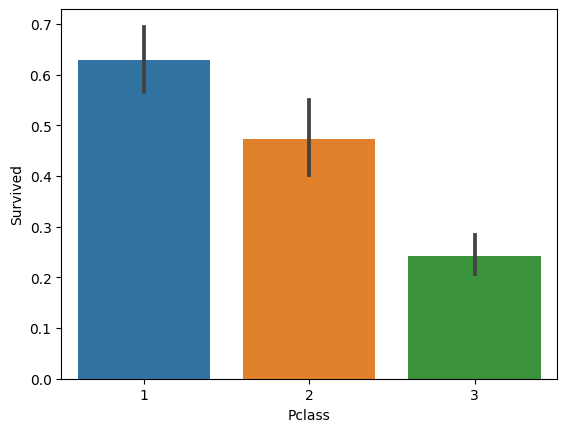

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure()
sns.barplot(x='Pclass', y='Survived', data=df)
plt.xlabel('Pclass')
plt.ylabel('Survived')
wb.sheets[1].pictures.add(fig, name='MyPlot', update=True)

In [ ]:
wb.save('automate_excel_with_python.xlsx')
wb.close()

<h1 style="color:#008B8B">3. Макросы</h1>

https://docs.xlwings.org/en/stable/vba.html#run-python

Создаём новый модуль и добавляем этот код:

```C
Sub HelloWorld()
    RunPython "import hello; hello.world()"
End Sub
```

Это вызывает следующий код в hello.py:

```Python
# hello.py
import numpy as np
import xlwings as xw


def world():
    wb = xw.Book.caller()
    wb.sheets[0]['A1'].value = 'Hello World!'
```

В Windows, в качестве альтернативы вызову макросов через Run Python, вы также можете использовать декоратор @xw.sub:

```python
import xlwings as xw


@xw.sub
def my_macro():
    """Writes the name of the Workbook into Range("A1") of Sheet 1"""
    wb = xw.Book.caller()
    wb.sheets[0].range('A1').value = wb.name
```

<h1 style="color:#008B8B">4. Конфигурирование</h1> (ЭТУ ТЕМУ НЕ УСПЕЛИ РАЗОБРАТЬ, БУДЕТ ЗАПРОС, НАПИШУ ТУТОРИАЛ)

У данного инструмента есть возможность использовать его без установки надстройки. То есть, нам достаточно использовать конфигурационные файлы, чтобы использовать возможности библиотеки.

`C:\Users\your_system_username\.xlwings\xlwings.conf`


**Как выглядит конфигурационный файл:**

```
"ADD_WORKBOOK_TO_PYTHONPATH","False"
"USE UDF SERVER","False"
"SHOW CONSOLE","False"
"INTERPRETER_WIN","D:\GitHub\venv\Scripts\python.exe"
"PYTHONPATH","D:\GitHub\titanic"
```


**1. Удаляем надстройку**

`xlwings addin remove`

**2. Создаём новый проект**

`xlwings quickstart demo_config --standalone`

**Как добавить макросы в уже рабочую книгу?**

In [129]:
xw.__file__

'D:\\GitHub\\venv\\lib\\site-packages\\xlwings\\__init__.py'

Копируем этот кусочек:

`D:\\GitHub\\venv\\lib\\site-packages\\xlwings`

`Dictionary.cls`- macos

`xlwings.bas` - windows

**Как передать параметры?**

https://stackoverflow.com/questions/35606251/how-to-pass-arguments-from-xlwings-to-vba-excel-macro

https://stackoverflow.com/questions/34167920/passing-a-variable-from-excel-to-python-with-xlwings

**Документация в PDF**

https://buildmedia.readthedocs.org/media/pdf/xlwings/stable/xlwings.pdf

**Тут можно почитать что-то полезное:**

https://www.quora.com/How-does-PyXLL-or-xlwings-of-Python-help-Excel-automation-Is-it-in-terms-of-performance-or-do-we-get-any-additional-features


**Хороший код по titanic**

https://www.kaggle.com/competitions/titanic/data

https://www.kaggle.com/code/brendan45774/titanic-top-solution

https://www.kaggle.com/code/ash316/eda-to-prediction-dietanic

https://www.kaggle.com/code/gunesevitan/titanic-advanced-feature-engineering-tutorial